In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Task_ID': ['T001', 'T002', 'T003', 'T004', 'T005'],
    'Description': [
        'Fix Electrical Panel', 
        'Inspect Pipeline', 
        'Repair Pump', 
        'Replace Valve', 
        'Check Safety Systems'
    ],
    'Task_Type': ['Electrical', 'Mechanical', 'Mechanical', 'Plumbing', 'General'],
    'Complexity': [4, 2, 5, 3, 2],
    'Estimated_Hours': [4.5, 2.0, 6.0, 3.5, 2.5]
}
df = pd.DataFrame(data)

In [3]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Complexity']),
        ('text', TfidfVectorizer(max_features=50), 'Description')
    ])

In [4]:
##Linear Regression

linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [5]:
X = df[['Complexity', 'Description']]
y = df['Estimated_Hours']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Complexity']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=50),
                                                  'Description')])),
                ('regressor', LinearRegression())])

In [8]:
linear_pred = linear_pipeline.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    print(f"{model_name} Model Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")

evaluate_model(y_test, linear_pred, "Linear Regression")

Linear Regression Model Metrics:
Mean Absolute Error: 0.75
Mean Squared Error: 0.56


In [10]:
##Decision Tree

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [11]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Complexity']),
                                                 ('text',
                                                  TfidfVectorizer(max_features=50),
                                                  'Description')])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [12]:
tree_pred = tree_pipeline.predict(X_test)

In [13]:
evaluate_model(y_test, tree_pred, "Decision Tree")

Decision Tree Model Metrics:
Mean Absolute Error: 1.50
Mean Squared Error: 2.25


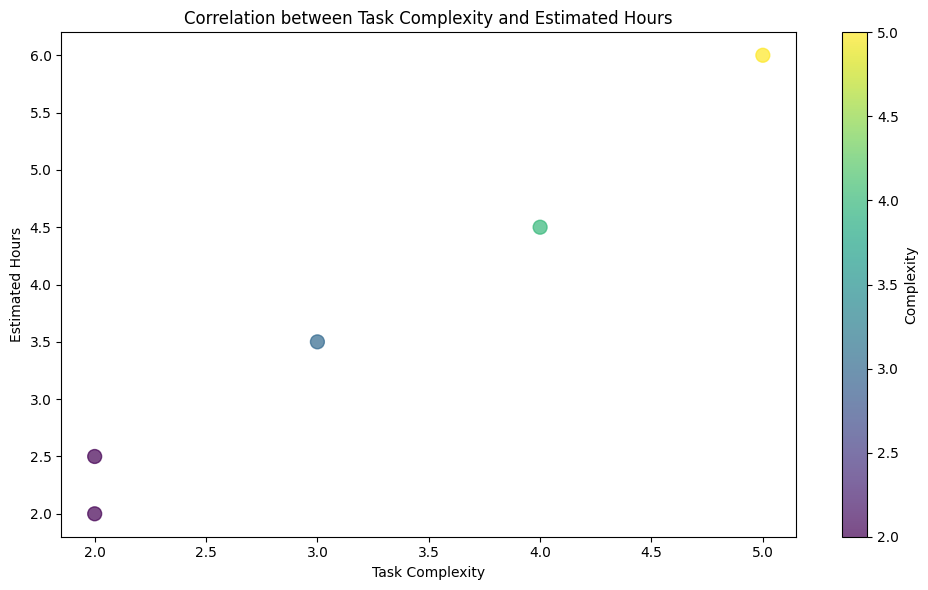

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Complexity'], df['Estimated_Hours'], 
            c=df['Complexity'], cmap='viridis', 
            alpha=0.7, s=100)
plt.colorbar(label='Complexity')
plt.xlabel('Task Complexity')
plt.ylabel('Estimated Hours')
plt.title('Correlation between Task Complexity and Estimated Hours')
plt.tight_layout()
plt.savefig('complexity_vs_hours.png')
plt.show()

In [15]:
def predict_task_duration(task_description, complexity):
    new_task_data = pd.DataFrame({
        'Description': [task_description],
        'Complexity': [complexity]
    })
    
    lr_prediction = tree_pipeline.predict(new_task_data)[0]
    dt_prediction = linear_pipeline.predict(new_task_data)[0]
    
    print(f"\nPredicted Duration: ")
    print(f"Linear Regression: {lr_prediction:.2f} hours")
    print(f"Decision Tree: {dt_prediction:.2f} hours")

In [16]:
predict_task_duration('Replace Valve', 3)


Predicted Duration: 
Linear Regression: 3.50 hours
Decision Tree: 3.50 hours
